In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

In [3]:
wine=pd.read_csv('C:\\Users\\LENOVO\\Downloads\\wine.csv')
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
from sklearn.decomposition import PCA

In [6]:
from sklearn.preprocessing import scale

Normalising the Numeric data

In [7]:
wine_normal=scale(wine)

In [8]:
pca = PCA(n_components = 6)
pca_values = pca.fit_transform(wine_normal)

The Amount of variance that each PCA explain is

In [9]:
var = pca.explained_variance_ratio_
var
pca.components_[0]

array([ 0.39366953, -0.13632501,  0.22267638, -0.00225793,  0.22429849,
       -0.12463016, -0.35926404, -0.39071171,  0.2670012 , -0.2790625 ,
        0.08931829, -0.27682265, -0.35052618, -0.26951525])

 Cumulative Variance

In [10]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 ])

variance plot for PCA components obtained

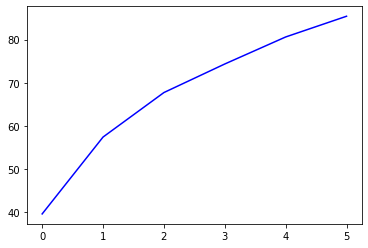

In [11]:
plt.plot(var1,color="blue")

 Plot beetween PCA1 and PCA2

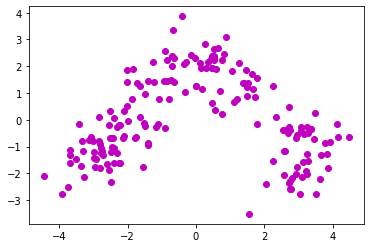

In [12]:
x = pca_values[:,0]
y = pca_values[:,1]
plt.scatter(x,y,color=["m"])

Performing Clustering

In [13]:
new_df = pd.DataFrame(pca_values[:,0:4])

In [14]:
new_df

,0,1,2,3
0,-3.522934,-1.453098,-0.164795,-0.013273
1,-2.528858,0.330019,-2.026707,-0.417144
2,-2.785029,-1.036936,0.983238,0.664232
3,-3.922588,-2.768210,-0.174968,0.565088
4,-1.407511,-0.867773,2.025829,-0.440906
...,...,...,...,...
173,3.627996,-2.206617,-0.343668,0.751705
174,2.942729,-1.752263,0.207480,0.399381
175,3.027272,-2.756040,-0.940803,0.607758
176,2.755222,-2.293784,-0.550474,-0.391570


In [15]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(new_df)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [16]:
clusters = kmeans.fit_predict(pca_values[:,:3])

In [17]:
cluster_df = pd.DataFrame(pca_values[:,:3])
cluster_df = cluster_df.rename(columns = {0: 'PC1', 1: 'PC2', 2: 'PC3'})

['PC1', 'PC2']


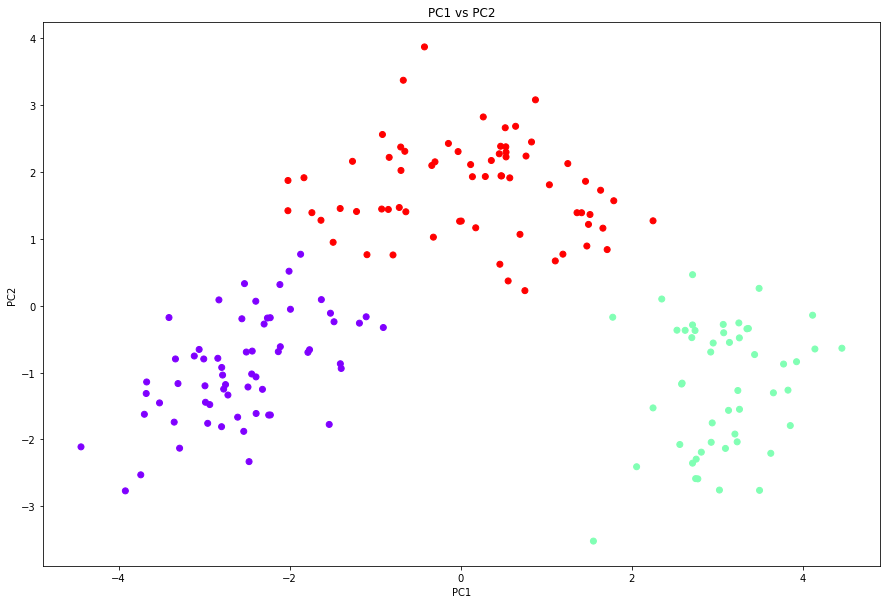

['PC1', 'PC3']


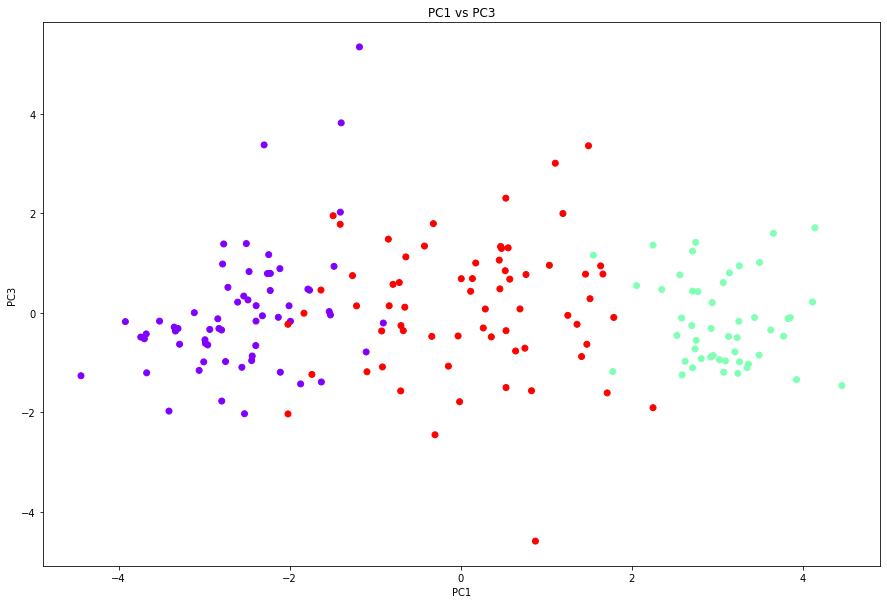

['PC2', 'PC3']


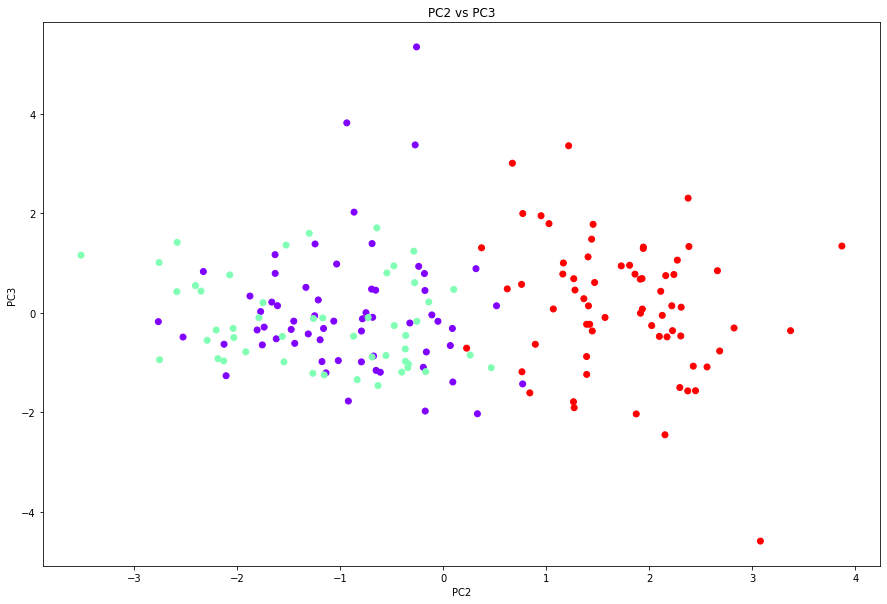

In [18]:
for i in itertools.combinations(cluster_df.columns,2):
    comb = list(i)
    print(comb)
    fig = plt.subplots(figsize = (15,10))
    plt.scatter(cluster_df[comb[0]], cluster_df[comb[1]] , c = clusters , cmap = 'rainbow')
    plt.xlabel(comb[0])
    plt.ylabel(comb[1])
    plt.title(comb[0] + ' ' + 'vs' + ' ' + comb[1])
    plt.show()

Hierarchical clustering

In [19]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

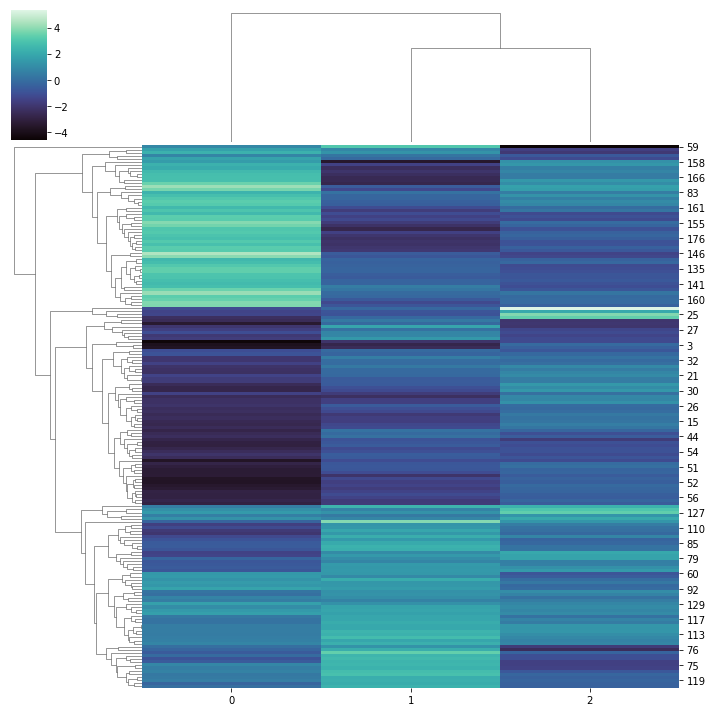

In [20]:
sns.clustermap(pca_values[:,:3], cmap = 'mako')

In [21]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [22]:
y_hc = hc.fit_predict(pca_values[:,:3])

['PC1', 'PC2']


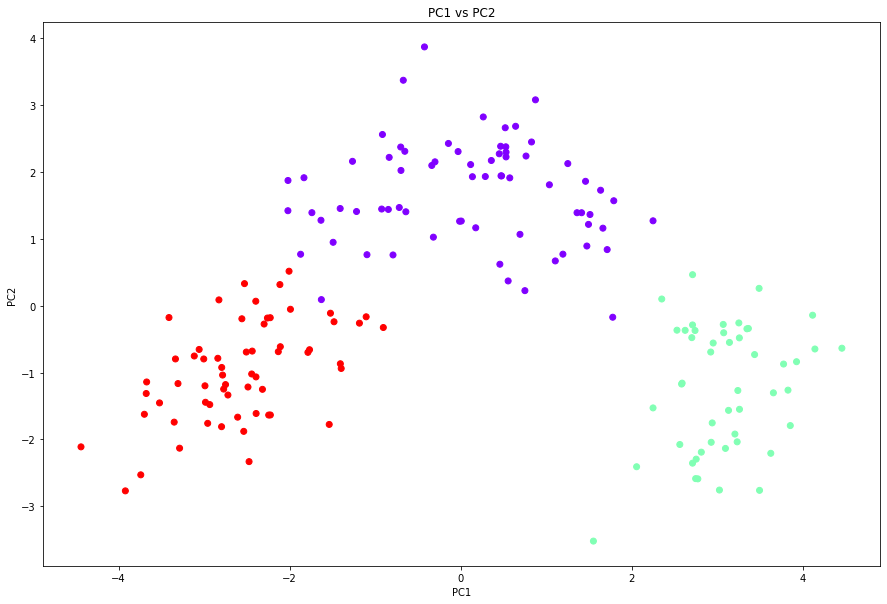

['PC1', 'PC3']


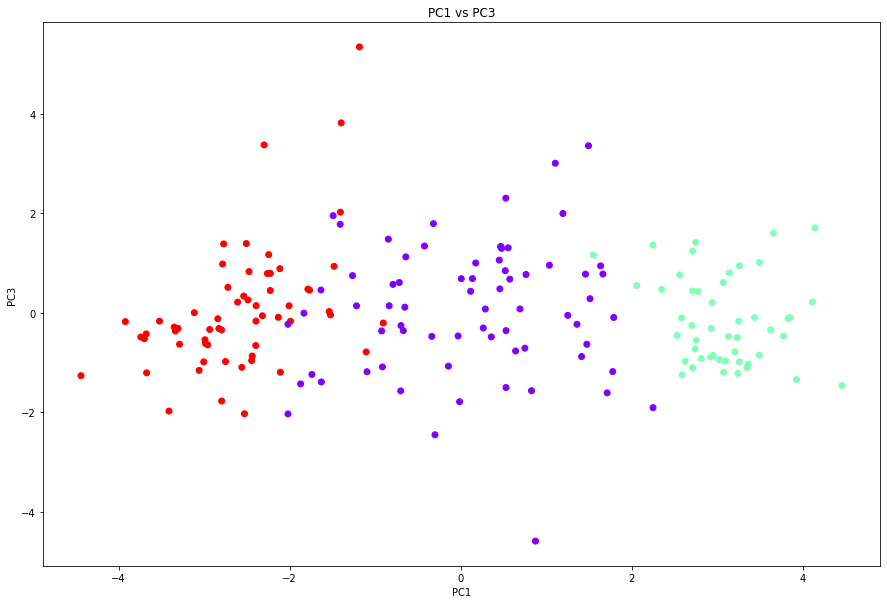

['PC2', 'PC3']


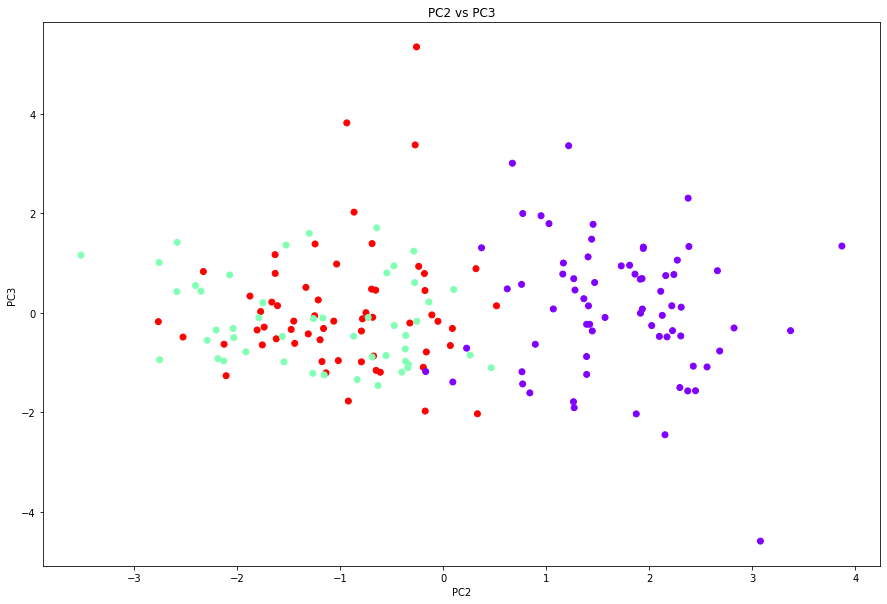

In [23]:
for i in itertools.combinations(cluster_df.columns,2):
    comb = list(i)
    print(comb)
    fig = plt.subplots(figsize = (15,10))
    plt.scatter(cluster_df[comb[0]], cluster_df[comb[1]] , c = y_hc , cmap = 'rainbow')
    plt.xlabel(comb[0])
    plt.ylabel(comb[1])
    plt.title(comb[0] + ' ' + 'vs' + ' ' + comb[1])
    plt.show()

In [24]:
classification_df_hc = pd.DataFrame()
classification_df_hc['Actual Type'] = wine['Type']
classification_df_hc['Identified Clusters'] = y_hc
classification_df_hc

,Actual Type,Identified Clusters
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
173,3,1
174,3,1
175,3,1
176,3,1
